In [0]:
from fastai import *
from fastai.vision import *

! unzip DevanagariHandwrittenCharacterDataset.zip 

In [0]:
path = Path('DevanagariHandwrittenCharacterDataset/')
path_train = Path(path/'Train')

In [7]:
data = ImageDataBunch.from_folder(path_train, valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=64)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (62560 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
digit_6,digit_6,digit_6,digit_6,digit_6
Path: DevanagariHandwrittenCharacterDataset/Train;

Valid: LabelList (15640 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
character_5_kna,digit_4,character_22_pha,digit_9,character_5_kna
Path: DevanagariHandwrittenCharacterDataset/Train;

Test: None

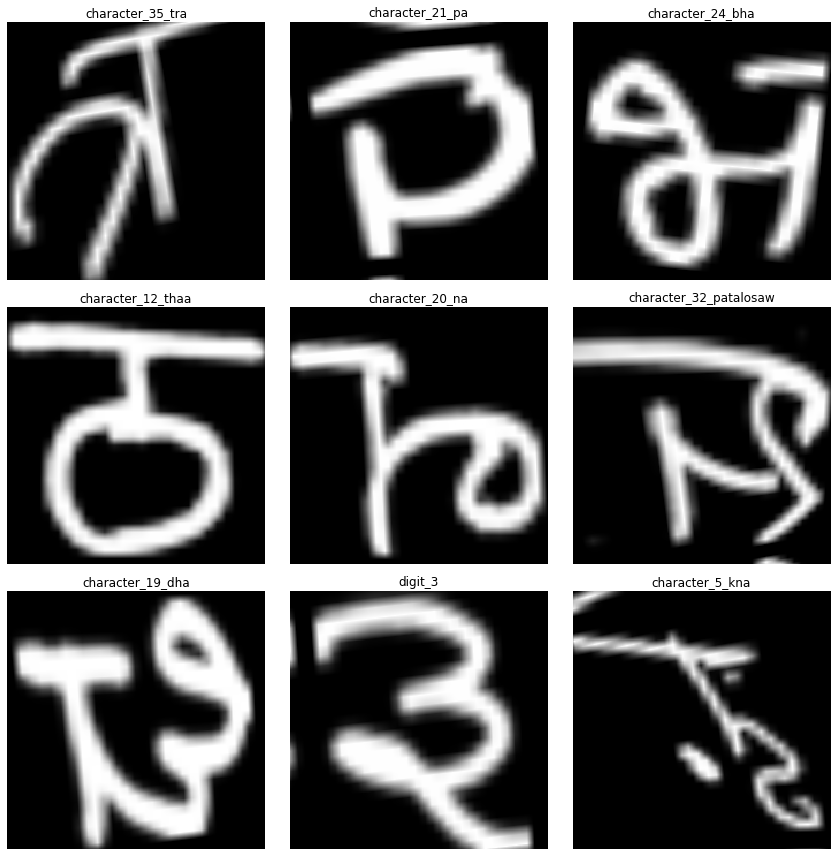

In [8]:
data.show_batch(3, fig_size=(5,5))

In [9]:
data.classes

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [0]:
learn = cnn_learner(data, models.resnet50, metrics=accuracy)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,0.486011,0.209895,0.935742,08:03
1,0.211502,0.098039,0.969757,07:55
2,0.110397,0.050952,0.983824,07:58
3,0.079138,0.043117,0.986765,07:54


In [0]:
learn.save('Stage-1')

In [0]:
learn.load('Stage-1')

In [28]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


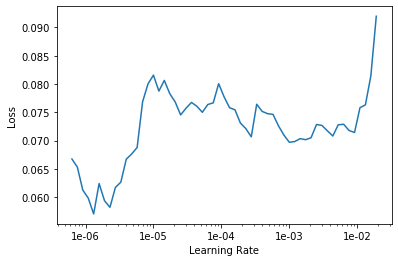

In [29]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [31]:
learn.fit_one_cycle(2, slice(1e-4, 1e-2))

epoch,train_loss,valid_loss,accuracy,time
0,0.227922,0.148575,0.955691,08:26
1,0.053470,0.030710,0.990409,08:26


In [0]:
learn.save('Smashed_the_SoTA') #Previous SoTA on this dataset 98.47%

In [0]:
defaults.device = torch.device('cpu')

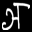

In [34]:
img = open_image(path/'Test/character_10_yna/10544.png')
img

In [36]:
pred_class = learn.predict(img)[0]
pred_class

Category character_10_yna